In [1]:
print("Started")
import numpy as np, pandas as pd
print("Pandas version - ", pd.__version__)
from pandas import MultiIndex, Int16Dtype
import seaborn as sns
import matplotlib.pyplot as plt
#import cupy, cudf
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model,tree,svm

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble     import HistGradientBoostingRegressor

import pickle

from sklearn.metrics import mean_absolute_error
print("All necessary libraries imported")

Started
Pandas version -  1.4.3


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


All necessary libraries imported


In [2]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

print(traindf.shape, " - Training dataset shape")
print(testdf.shape, " - Testing dataset shape")
print(sample_sub.shape, " - Sample Submission dataset shape")

(6036000, 8)  - Training dataset shape
(4024000, 7)  - Testing dataset shape
(4024000, 2)  - Sample Submission dataset shape


In [3]:
traindf['time_delta'] = traindf.groupby('breath_id')['time_step'].diff()
common_features = ['breath_id','R','C','time_step','u_in','u_out']
numerical_features = ['time_step','u_in']
categorical_features = ['R','C','u_out','breath_id']

# EDA

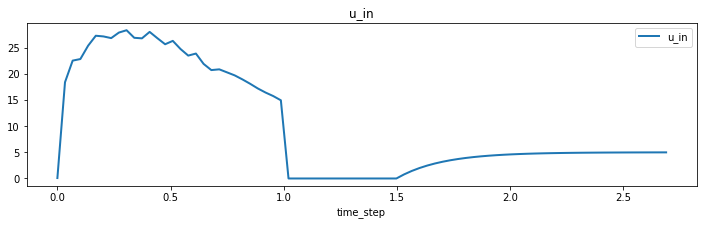

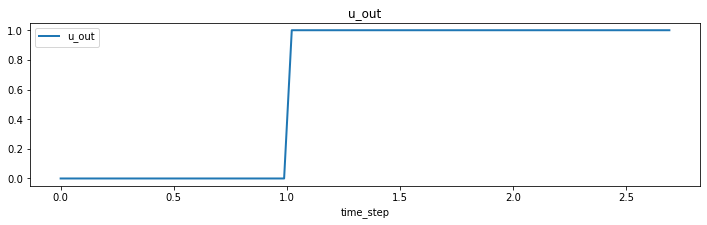

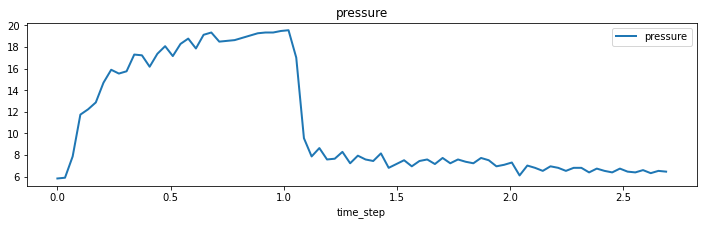

In [5]:
breath_one = traindf.query('breath_id == 1').reset_index(drop = True)

breath_one.plot(x="time_step", y="u_in", kind='line',figsize=(12,3), lw=2, title="u_in");
breath_one.plot(x="time_step", y="u_out", kind='line',figsize=(12,3), lw=2, title="u_out");
breath_one.plot(x="time_step", y="pressure", kind='line',figsize=(12,3), lw=2, title="pressure");

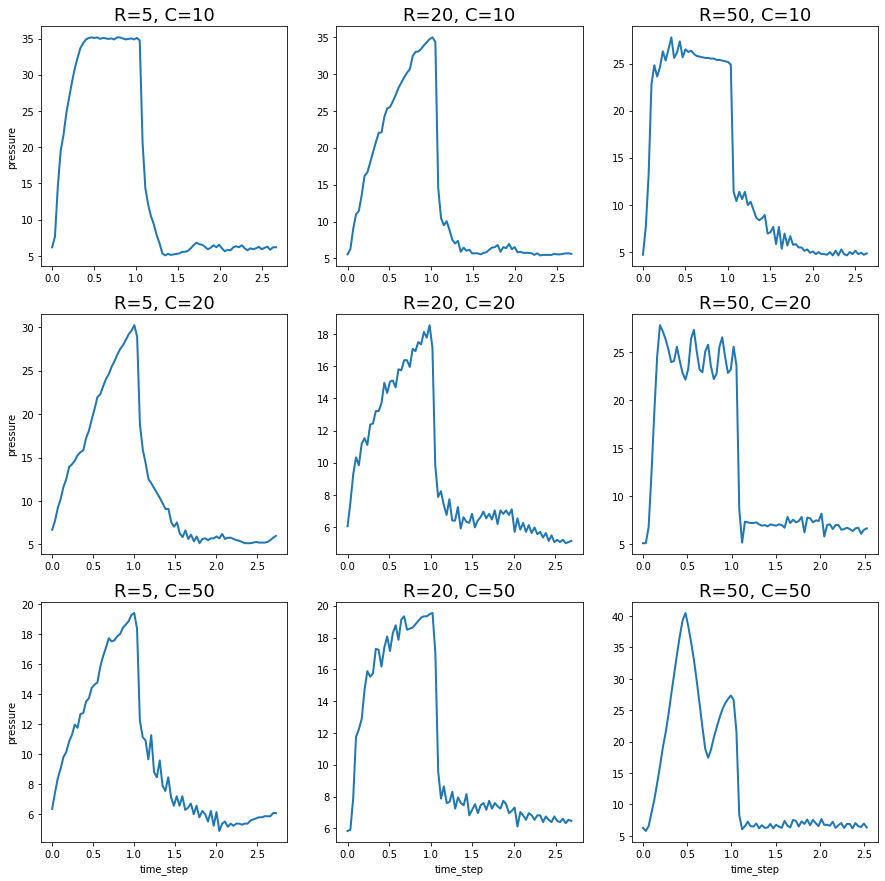

In [8]:
breath_2 = traindf.query('breath_id == 2').reset_index(drop = True)
breath_3 = traindf.query('breath_id == 3').reset_index(drop = True)
breath_4 = traindf.query('breath_id == 4').reset_index(drop = True)
breath_5 = traindf.query('breath_id == 5').reset_index(drop = True)
breath_17 = traindf.query('breath_id == 17').reset_index(drop = True)
breath_18 = traindf.query('breath_id == 18').reset_index(drop = True)
breath_21 = traindf.query('breath_id == 21').reset_index(drop = True)
breath_39 = traindf.query('breath_id == 39').reset_index(drop = True)

fig, axes = plt.subplots(3,3,figsize=(15,15))
sns.lineplot(data=breath_39, x="time_step", y="pressure", lw=2, ax=axes[0,0])
axes[0,0].set_title ("R=5, C=10", fontsize=18)
axes[0,0].set(xlabel='')
#axes[0,0].set(ylim=(0, None))
sns.lineplot(data=breath_21, x="time_step", y="pressure",  lw=2, ax=axes[0,1])
axes[0,1].set_title ("R=20, C=10", fontsize=18)
axes[0,1].set(xlabel='')
axes[0,1].set(ylabel='')
#axes[0,1].set(ylim=(0, None))
sns.lineplot(data=breath_18, x="time_step", y="pressure",  lw=2,ax=axes[0,2])
axes[0,2].set_title ("R=50, C=10", fontsize=18)
axes[0,2].set(xlabel='')
axes[0,2].set(ylabel='')
#axes[0,2].set(ylim=(0, None))
sns.lineplot(data=breath_17, x="time_step", y="pressure",  lw=2,ax=axes[1,0])
axes[1,0].set_title ("R=5, C=20", fontsize=18)
axes[1,0].set(xlabel='')
#axes[1,0].set(ylim=(0, None))
sns.lineplot(data=breath_2, x="time_step", y="pressure",  lw=2,ax=axes[1,1])
axes[1,1].set_title ("R=20, C=20", fontsize=18)
axes[1,1].set(xlabel='')
axes[1,1].set(ylabel='')
#axes[1,1].set(ylim=(0, None))
sns.lineplot(data=breath_3, x="time_step", y="pressure",  lw=2,ax=axes[1,2])
axes[1,2].set_title ("R=50, C=20", fontsize=18)
axes[1,2].set(xlabel='')
axes[1,2].set(ylabel='')
#axes[1,2].set(ylim=(0, None))
sns.lineplot(data=breath_5, x="time_step", y="pressure",  lw=2,ax=axes[2,0])
axes[2,0].set_title ("R=5, C=50", fontsize=18)
#axes[2,0].set(ylim=(0, None))
sns.lineplot(data=breath_one, x="time_step", y="pressure",  lw=2,ax=axes[2,1])
axes[2,1].set_title ("R=20, C=50", fontsize=18)
axes[2,1].set(ylabel='')
#axes[2,1].set(ylim=(0, None))
sns.lineplot(data=breath_4, x="time_step", y="pressure",  lw=2,ax=axes[2,2])
axes[2,2].set_title ("R=50, C=50", fontsize=18)
axes[2,2].set(ylabel='')
#axes[2,2].set(ylim=(0, None))

plt.show();

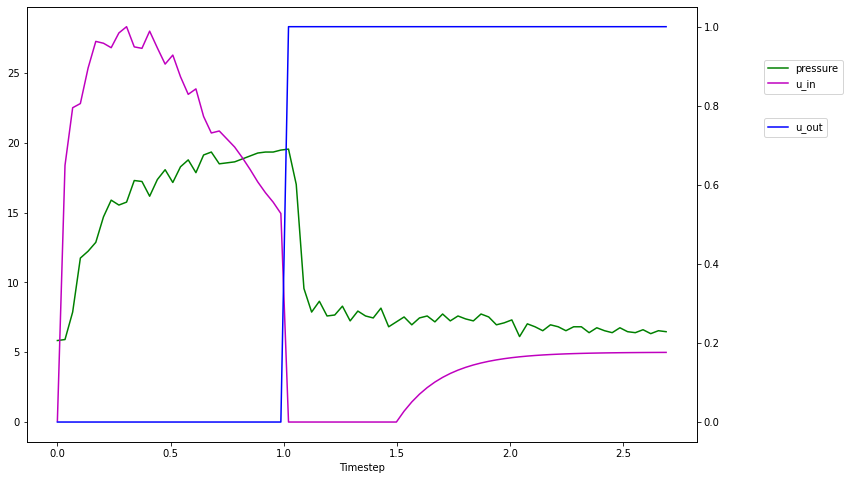

In [14]:
#From: https://www.kaggle.com/artgor/ventilator-pressure-prediction-eda-fe-and-models
fig, ax1 = plt.subplots(figsize = (12, 8))

breath_1 = traindf.loc[traindf['breath_id'] == 1]
ax2 = ax1.twinx()

ax1.plot(breath_1['time_step'], breath_1['pressure'], 'g-', label='pressure')
ax1.plot(breath_1['time_step'], breath_1['u_in'], 'm-', label='u_in')
ax2.plot(breath_1['time_step'], breath_1['u_out'], 'b-', label='u_out')

ax1.set_xlabel('Timestep')
ax1.legend(loc=(1.1, 0.8))
ax2.legend(loc=(1.1, 0.7))
plt.show()

In [15]:
def plot_time_step(bid):
    plt.figure()
    tmp = traindf.loc[traindf['breath_id'] == bid].reset_index(drop=True)
    R = tmp['R'][0]
    C = tmp['C'][0]
    plt.title(f'breath_id:{bid}, R:{R}, C:{C}')
    plt.ylabel('Timestep')
    plt.xlabel('Row No.')

    plt.plot(traindf.loc[traindf['breath_id'] == bid]['time_step'].tolist())
    plt.show()

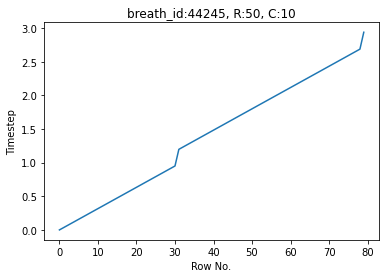

In [16]:
plot_time_step(44245)

In [19]:
no_prop_list = list(traindf.loc[traindf['time_delta']>0.15]['breath_id'].unique())

broken_one_list = [3178, 16315, 18117, 24127, 28942, 39045, 46324, 54129, 55244, 72104, 76037, 87776, 104001, 119689, 120878]
broken_two_list = [36175, 38415, 44245, 55851, 74766, 109693, 111439]

In [22]:
def plot_double_bid(bid, time_delta=False):
    fig = plt.figure(figsize = (12, 4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    tmp = traindf.loc[traindf['breath_id'] == bid].reset_index(drop=True)

    ts = []
    td = []
    if time_delta:
        outlier = tmp.loc[tmp['time_delta'] > 0.15]
        rw = list(outlier['id'])
        ts = list(outlier['time_step'])
        td = list(outlier['time_delta'])
        
    
    R = tmp['R'][0]
    C = tmp['C'][0]
    ax1.set_title(f'breath_id:{bid}, R:{R}, C:{C}')
    ax1.set_ylabel('Timestep')
    ax1.set_xlabel('Row No.')

    ymax = 3.0
    ax1.set_ylim(0, ymax)

    if time_delta:
        rows = []
        for a in rw:
            aa = a % 80 - 2
            if aa < 0:
                aa += 80
            rows.append(aa)
            aa = a % 80 - 1
            if aa < 0:
                aa += 80
            rows.append(aa)
        ax1.vlines(rows, 0, ymax, "red", linestyles='dashed', alpha=0.2)

    
    ax1.plot(traindf.loc[traindf['breath_id'] == bid]['time_step'].tolist())

    ##############################
    ax3 = ax2.twinx()

    ax2.plot(tmp['time_step'], tmp['pressure'], 'g-', label='pressure')
    ax2.plot(tmp['time_step'], tmp['u_in'], 'm-', label='u_in')
    ax3.plot(tmp['time_step'], tmp['u_out'], 'k-', label='u_out')

    ax2.set_xlabel('Timestep')
    
    R = tmp['R'][0]
    C = tmp['C'][0]
    ax2.set_title(f'breath_id:{bid}, R:{R}, C:{C}')

    ymax = 100
    ax2.set_ylim(0, ymax)
    
    if time_delta:
        lines = []
        for a, b in zip(ts, td):
            lines.append(a-b)
            lines.append(a)
        ax2.vlines(lines, 0, ymax, "red", linestyles='dashed', alpha=0.2)
    
    ax2.legend(loc=(1.1, 0.8))
    ax3.legend(loc=(1.1, 0.7))
    
    fig.tight_layout()
    plt.show()

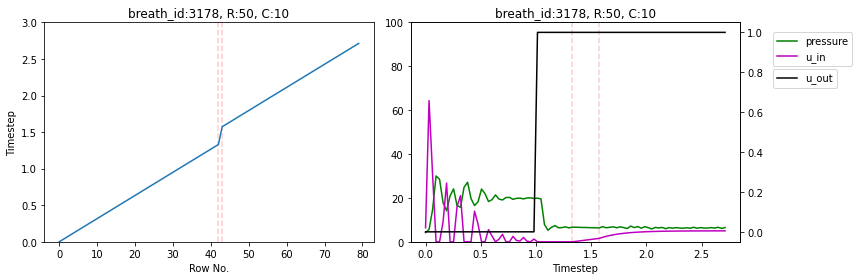

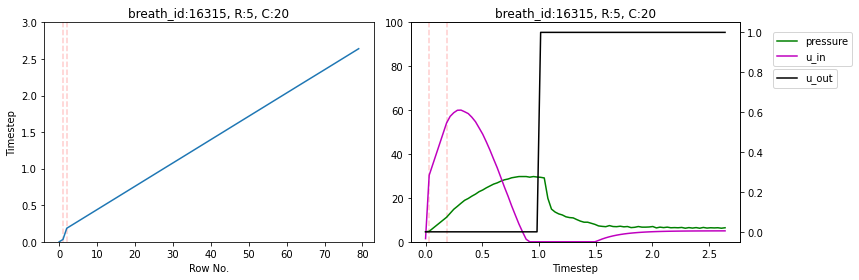

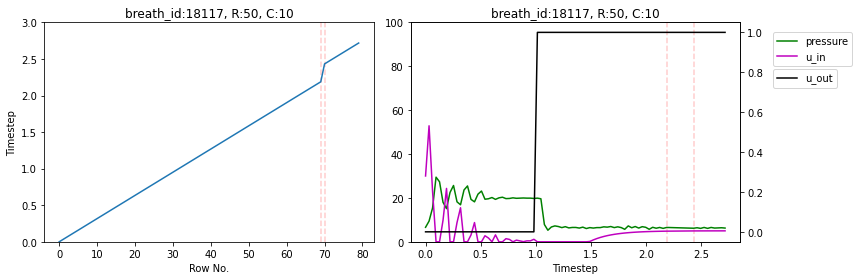

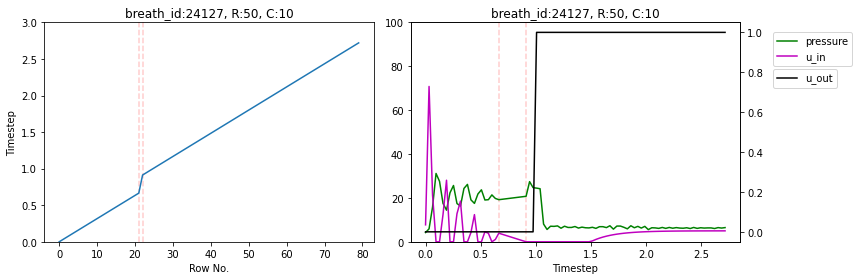

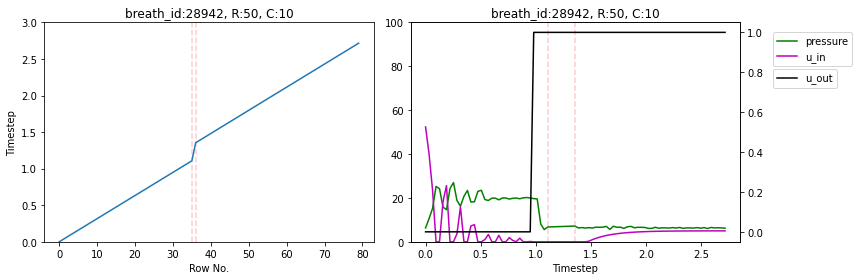

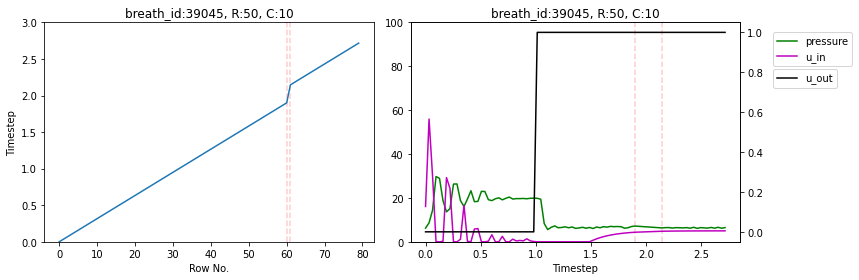

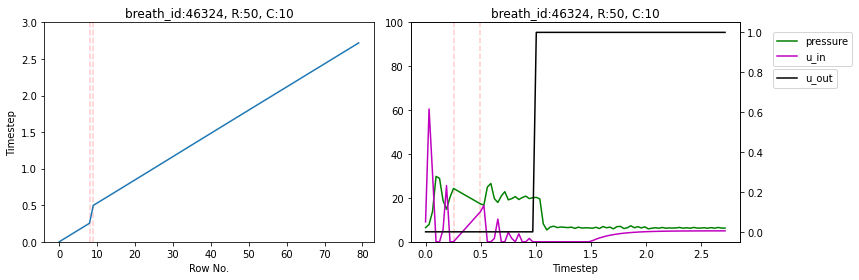

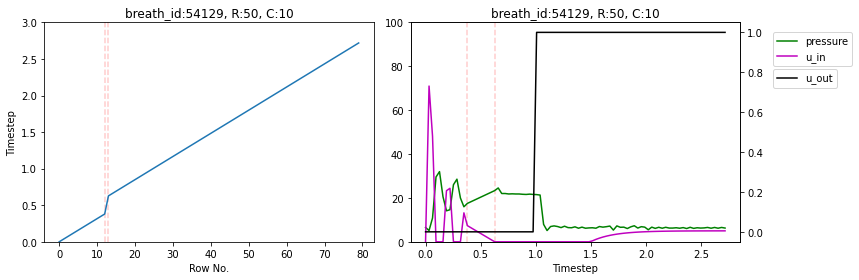

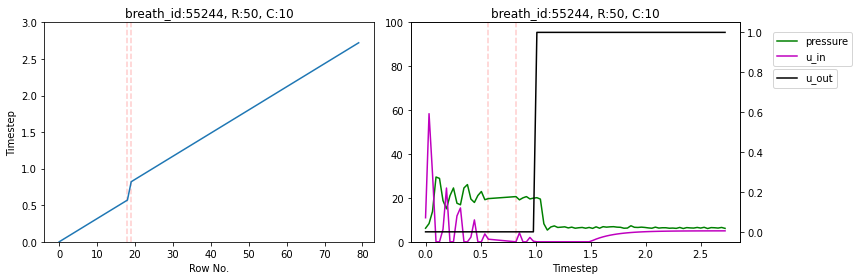

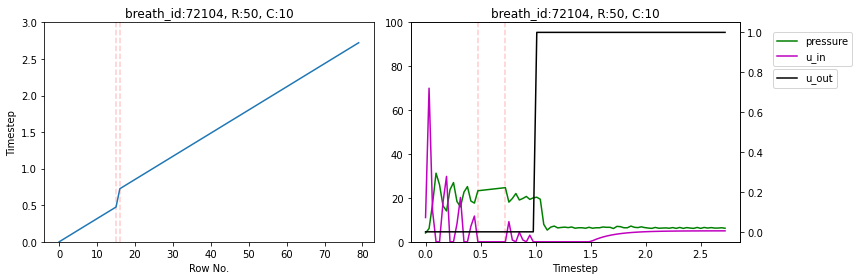

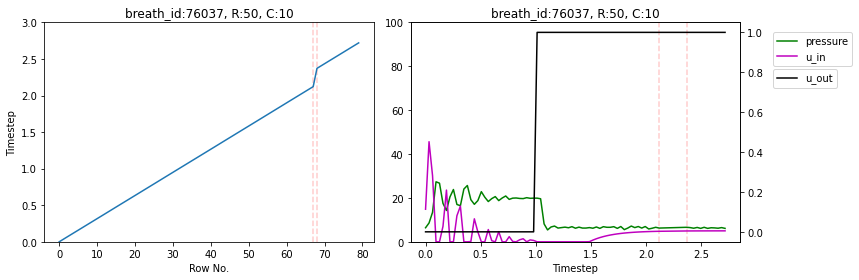

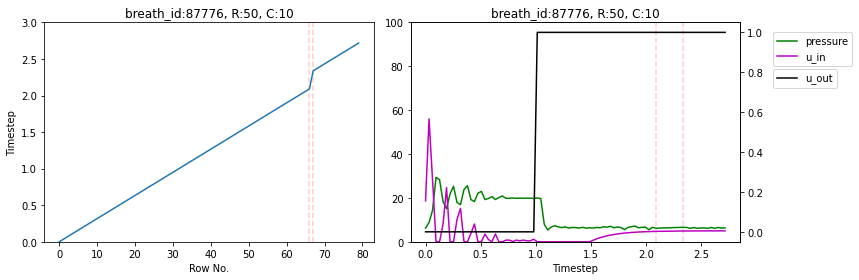

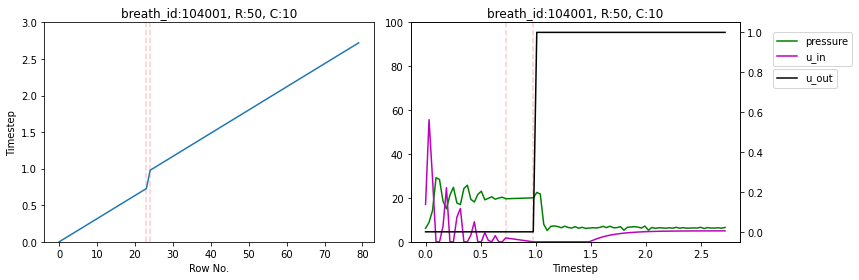

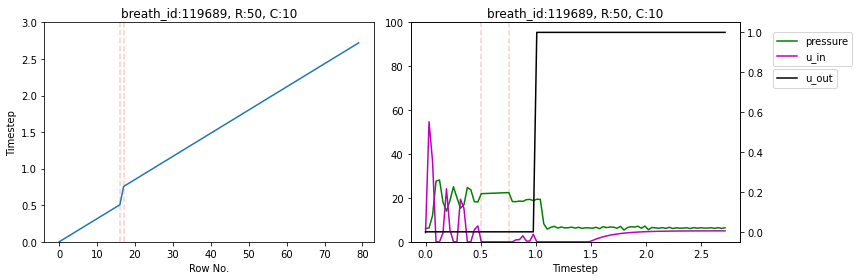

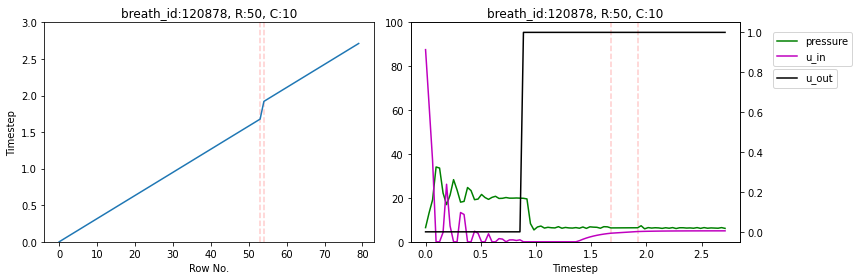

In [23]:
for bid in broken_one_list:
    plot_double_bid(bid, time_delta=True)

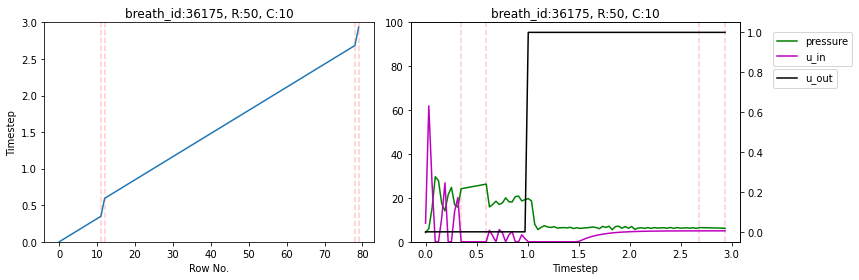

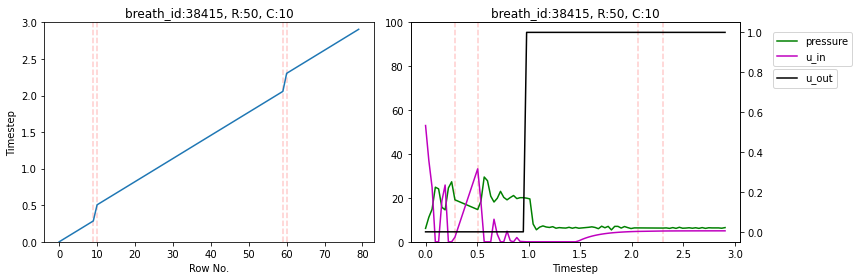

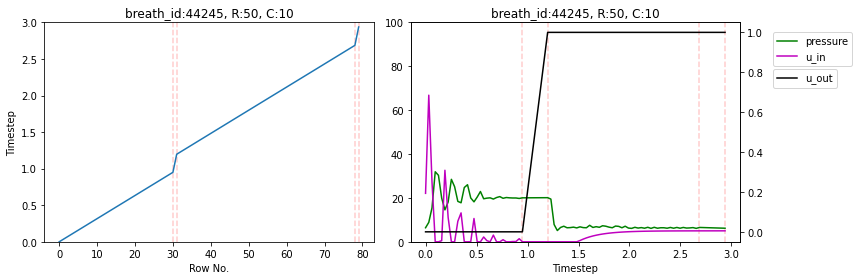

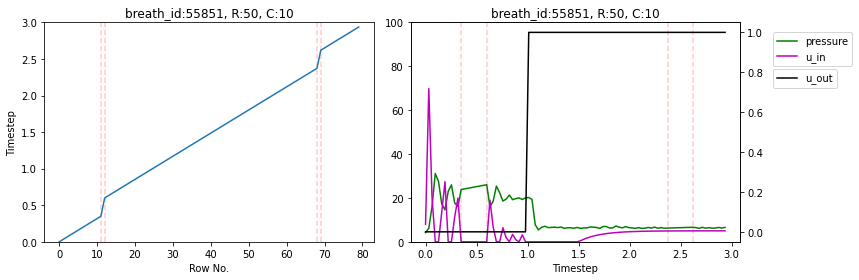

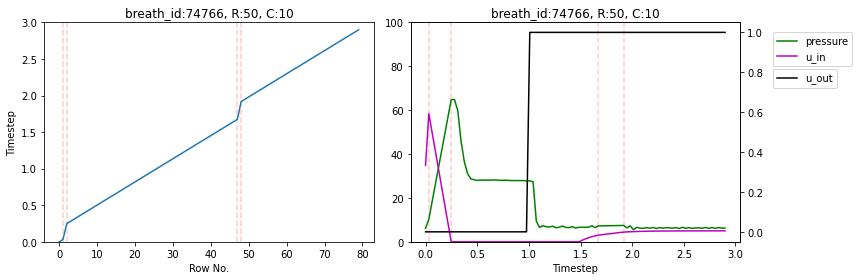

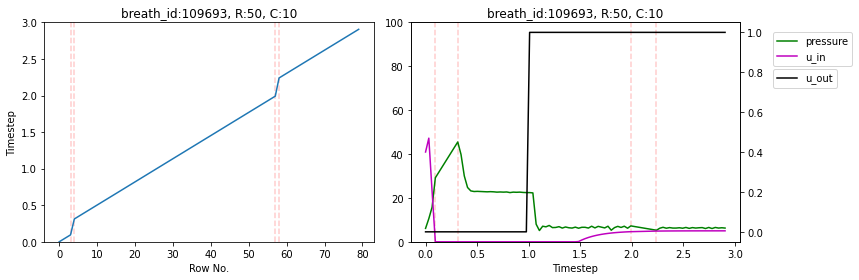

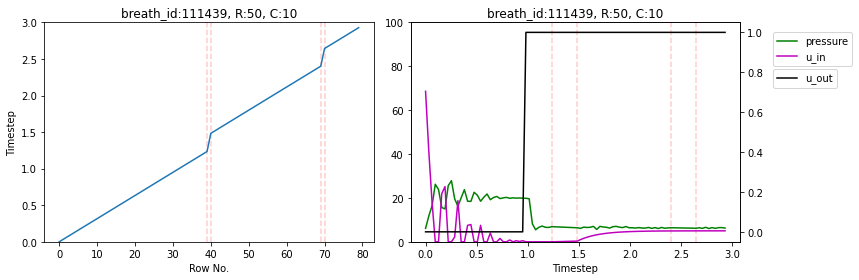

In [24]:
for bid in broken_two_list:
    plot_double_bid(bid, time_delta=True)

In [26]:
print("Total Broken - ",len(no_prop_list))
print("Broken One list - ",len(broken_one_list))
print("Broken Two list - ",len(broken_two_list))

Total Broken -  22
Broken One list -  15
Broken Two list -  7


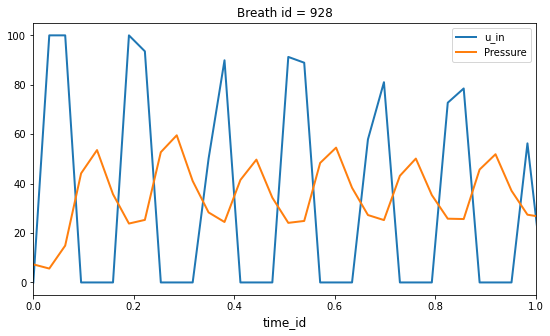

In [12]:
breath_928 = traindf.query('breath_id == 928').reset_index(drop = True)
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.plot(breath_928["time_step"],breath_928["u_in"], lw=2, label='u_in')
ax.plot(breath_928["time_step"],breath_928["pressure"], lw=2, label='Pressure')
ax.set(xlim=(0,1))
ax.set_title ("Breath id = 928", fontsize=12)
ax.legend(loc="upper right")
ax.set_xlabel("time_id", fontsize=12)
#ax.set_ylabel("u_in / pressure", fontsize=12)
plt.show();

# Training Model

In [13]:
for df in (traindf,testdf):
    df['u_in_first']  = df.groupby('breath_id')['u_in'].transform('first')
    df['u_in_min']    = df.groupby('breath_id')['u_in'].transform('min')
    df['u_in_mean']   = df.groupby('breath_id')['u_in'].transform('mean')
    df['u_in_median'] = df.groupby('breath_id')['u_in'].transform('median')
    df['u_in_max']    = df.groupby('breath_id')['u_in'].transform('max')
    df['u_in_last']   = df.groupby('breath_id')['u_in'].transform('last')

In [14]:
traindf = traindf.fillna(0)
traindf.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,time_delta,u_in_first,u_in_min,u_in_mean,u_in_median,u_in_max,u_in_last
0,1,1,20,50,0.000000,0.083334,0,5.837492,0.000000,0.083334,0.0,10.146007,4.922568,28.313036,4.987079
1,2,1,20,50,0.033652,18.383041,0,5.907794,0.033652,0.083334,0.0,10.146007,4.922568,28.313036,4.987079
2,3,1,20,50,0.067514,22.509278,0,7.876254,0.033862,0.083334,0.0,10.146007,4.922568,28.313036,4.987079
3,4,1,20,50,0.101542,22.808822,0,11.742872,0.034028,0.083334,0.0,10.146007,4.922568,28.313036,4.987079
4,5,1,20,50,0.135756,25.355850,0,12.234987,0.034213,0.083334,0.0,10.146007,4.922568,28.313036,4.987079


In [15]:
# Adding features in the dataframe

def add_features(df):
    #https://www.kaggle.com/code/papernist/google-brain
    df = df.copy()
    
    df_group = df.groupby(['breath_id'])
    
    
    feature_list = ['u_in', 'time_step', 'cross']
    
    df['cross']= df['u_in'] * df['u_out']
    df['area_out']= df['time_step'] * df['u_out']
    df['area'] = df['time_step'] * df['u_in']
    
    # add
    df['air_flow_rate'] = df['u_out'] - (df['u_in']/100.0)
    df['air_flow_area'] = df['air_flow_rate'] * df['time_step']
    print("Step-1...Completed")
    
    # cumsum cummean
    df['one'] = 1
    df['count'] = df_group['one'].cumsum()
    for feature in feature_list:
        df[f'{feature}_cumsum'] = df_group[feature].cumsum()
        df[f'{feature}_cummean'] = df[f'{feature}_cumsum'] / df['count']
        
    print("Step-2 cumsum cummean ...Completed")
    # lagging
    use_lags = 4
    for lag in range(1, use_lags+1):
        for feature in feature_list:
            # lag 
            df[f'{feature}_lag_{lag}'] = df_group[feature].shift(lag)
            # inverse lag
            df[f'{feature}_lag_inverse_{lag}'] = df_group[feature].shift(-lag)

            # dif lag
            df[f'{feature}_lag_diff_{lag}'] = df[feature] - df[f'{feature}_lag_{lag}']

            # dif inverse lag
            df[f'{feature}_lag_inverse_diff_{lag}'] = df[feature] - df[f'{feature}_lag_inverse_{lag}']

            df = df.drop(columns=[f'{feature}_lag_{lag}', f'{feature}_lag_inverse_{lag}'])
        
    df = df.fillna(0)
    print("Step-3 lagging ...Completed")
    
    
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    df['R__C'] = df["R"].astype(str) + '__' + df["C"].astype(str)
    df = pd.get_dummies(df)
    df = df.fillna(0)
    print("Step-4 categorical ...Completed")
    
    rolling_list = [15]
    for roll in rolling_list:
        for feature in feature_list:
            df[[f'{roll}_{feature}_sum',f'{roll}_{feature}_min',
                f'{roll}_{feature}_max',f'{roll}_{feature}_mean']] = (df_group[feature]\
                                                                  .rolling(window=roll,min_periods=1)\
                                                                  .agg({f'{roll}_{feature}_sum':'sum',
                                                                        f'{roll}_{feature}_min':'min',
                                                                        f'{roll}_{feature}_max':'max',
                                                                        f'{roll}_{feature}_mean':'mean'})\
                                                                   .reset_index(level=0,drop=True))
    
    print("Step-5 Sliding window...Completed")
    print()
    
    df = df.fillna(0)
    df = df.drop(['id', 'breath_id','one','count'], axis=1)
    
    return df.astype(np.float16)

In [ ]:
%%time
train = add_features(traindf)
test = add_features(testdf)

print("*"*70)
print(train.shape, " - Feature added training dataset shape")
print(test.shape, " - Features added testing dataset shape")

Step-1...Completed
Step-2 cumsum cummean ...Completed


In [ ]:
binary_col = []
num_col = []
for columnname in train.columns:
  if len(set(train[columnname])) != 2:
    num_col.append(columnname)
  else:
    binary_col.append(columnname)

print(len(binary_col), "Number of Binary Categorical Columns")
print(len(num_col),"Number of Numerical Columns")
print(len(binary_col)+len(num_col), "Sum of Binary & Numerical Columns")

In [ ]:
train.describe()

In [ ]:
train.columns

In [11]:
train.isnull().sum()

time_step            0
u_in                 0
u_out                0
pressure             0
time_delta           0
                    ..
15_time_step_mean    0
15_cross_sum         0
15_cross_min         0
15_cross_max         0
15_cross_mean        0
Length: 73, dtype: int64

In [13]:
scaler = MinMaxScaler()

train[num_col] = scaler.fit_transform(train[num_col])
train.head()

,time_step,u_in,u_out,pressure,time_delta,u_in_first,u_in_min,u_in_mean,u_in_median,u_in_max,...,15_u_in_max,15_u_in_mean,15_time_step_sum,15_time_step_min,15_time_step_max,15_time_step_mean,15_cross_sum,15_cross_min,15_cross_max,15_cross_mean
0,0.000000,0.000834,0.0,0.115845,0.000000,0.000834,0.0,0.297852,0.604492,0.283203,...,0.000834,0.000834,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.011459,0.183960,0.0,0.116943,0.134155,0.000834,0.0,0.297852,0.604492,0.283203,...,0.183960,0.092346,0.000836,0.0,0.011459,0.006271,0.0,0.0,0.0,0.0
2,0.022980,0.225220,0.0,0.146484,0.135010,0.000834,0.0,0.297852,0.604492,0.283203,...,0.225220,0.136597,0.002514,0.0,0.022980,0.012566,0.0,0.0,0.0,0.0
3,0.034576,0.228149,0.0,0.204468,0.135620,0.000834,0.0,0.297852,0.604492,0.283203,...,0.228149,0.159546,0.005035,0.0,0.034576,0.018890,0.0,0.0,0.0,0.0
4,0.046204,0.253662,0.0,0.211914,0.136353,0.000834,0.0,0.297852,0.604492,0.283203,...,0.253662,0.178345,0.008408,0.0,0.046204,0.025223,0.0,0.0,0.0,0.0


In [14]:
df_train, df_test = train_test_split(train, train_size = 0.7, test_size = 0.3, random_state = 100)

In [15]:
trainsplitcopy = df_train.copy()
testsplitcopy = df_test.copy()

y_train = trainsplitcopy.pop('pressure')
X_train = trainsplitcopy

y_test = testsplitcopy.pop('pressure')
X_test = testsplitcopy


print("*"*70)
print("Splitting the data into X train & Y train")
print(X_train.shape, "X train shape")
print(y_train.shape, "Y train shape")

print("*"*70)
print("Splitting the data into X test & Y test")
print(X_test.shape, "X test shape")
print(y_test.shape, "Y test shape")

**********************************************************************
Splitting the data into X train & Y train
(4225200, 72) X train shape
(4225200,) Y train shape
**********************************************************************
Splitting the data into X test & Y test
(1810800, 72) X test shape
(1810800,) Y test shape


## Hist Gradient Boost Regressor

In [17]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble     import HistGradientBoostingRegressor
regressor  =  HistGradientBoostingRegressor(max_iter=1000,
     loss="least_absolute_deviation",early_stopping=False)
regressor.fit(X_train, y_train)
#sample["pressure"] = regressor.predict(test_data)
#sample.to_csv('submission.csv',index=False)

HistGradientBoostingRegressor(early_stopping=False,
                              loss='least_absolute_deviation', max_iter=1000)

In [18]:
import pickle

with open('Hist_Gradient_boost_regressor_pkl','wb') as files:
    pickle.dump(regressor,files)

## Gradient Boost Regressor